In [19]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np

In [7]:
file_pattern = "/data/cristi/a/kchoo3/FluxesProcessing/pre-processed/annual/tas-annual_*_abrupt-4xCO2_*.nc"
ddict = glob.glob(file_pattern)

file_pattern = "/data/cristi/a/kchoo3/FluxesProcessing/pre-processed/annual/tas-annual_*_piControl_*.nc"
ctrlddict = glob.glob(file_pattern)

In [48]:
ds = xr.open_dataset(ddict[0])
ctrlds = xr.open_dataset(ctrlddict[0])

In [49]:
#ctrlds.mean('time')
new_lat = np.linspace(ds.lat.min(), ds.lat.max(), 150)
new_lon = np.linspace(ds.lon.min(), ds.lon.max(), 300)

ds = ds.interp(lat=new_lat, lon=new_lon)

ctrlds = ctrlds.interp(lat=new_lat, lon=new_lon)

In [45]:
ds.tas.mean('time').sel(lat=80, lon=170, method='nearest').values
#ds

array(277.64385905)

In [52]:
new_ds = ds - ctrlds.mean('time')
new_ds

#ds.mean('time').sel(lat=80, lon=170, method='nearest') - ctrlds.mean('time').sel(lat=80, lon=170, method='nearest')

<xarray.Dataset> Size: 360MB
Dimensions:  (time: 999, lat: 150, lon: 300)
Coordinates:
  * time     (time) object 8kB 0001-01-01 00:00:00 ... 0999-01-01 00:00:00
  * lat      (lat) float64 1kB -90.0 -88.79 -87.58 -86.38 ... 87.58 88.79 90.0
  * lon      (lon) float64 2kB 0.0 1.2 2.4 3.599 ... 355.2 356.4 357.6 358.8
    height   float64 8B 2.0
Data variables:
    tas      (time, lat, lon) float64 360MB nan nan nan nan ... nan nan nan nan

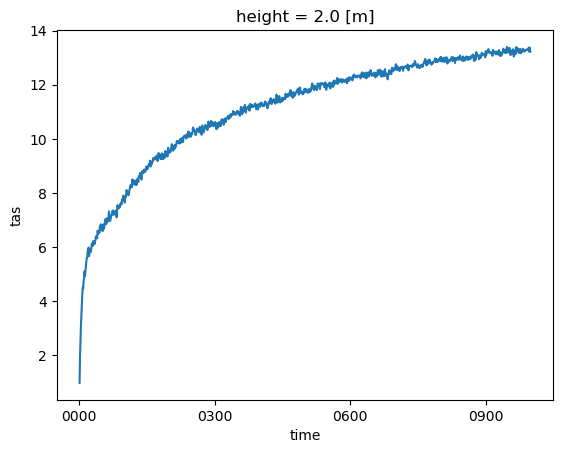

In [55]:
new_ds.tas.mean(dim=['lat','lon']).plot()

In [40]:
ctrlds = ctrlds.mean('time')
ds1, ds2 = xr.align(ds, ctrlds, join='inner', copy=True)

# Select variables
temp = ds1['tas']
baseline_temp = ds2['tas']

# Subtract
new_ds = temp - baseline_temp
new_ds

<xarray.DataArray 'tas' (time: 1, lat: 0, lon: 32)> Size: 0B
array([], shape=(1, 0, 32), dtype=float32)
Coordinates:
  * lat      (lat) float64 0B 
  * lon      (lon) float64 256B 0.0 11.25 22.5 33.75 ... 315.0 326.2 337.5 348.8
  * time     (time) object 8kB 0001-01-01 00:00:00 ... 0999-01-01 00:00:00
    height   float64 8B ...

In [4]:
ctrlds = ctrlds.mean("time")
ctrlds

<xarray.Dataset> Size: 209kB
Dimensions:  (lat: 160, lon: 320)
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Data variables:
    tas      (lat, lon) float32 205kB 225.8 225.8 225.7 ... 257.3 257.3 257.3

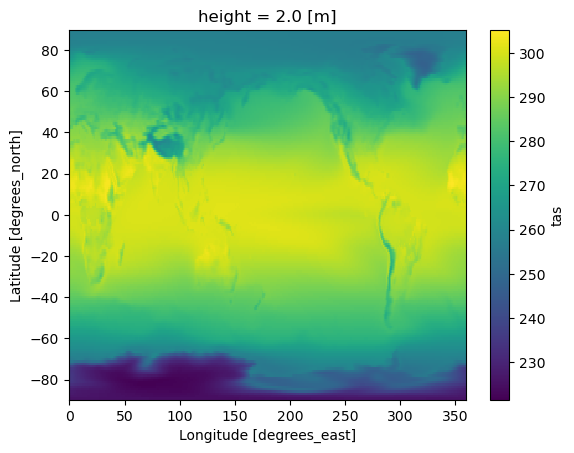

In [44]:
ctrlds.tas.plot()

In [30]:
Derived = xr.merge([ds, ctrlds])
skeleton_ds = Derived
new_ds = skeleton_ds.copy(deep=True)
new_ds['tas'] = ds - ctrlds
new_ds

ValueError: conflicting sizes for dimension 'time': length 1 on 'tas' and length 999 on {'lat': 'lat', 'lon': 'lon', 'time': 'time'}

In [8]:
new_ds = ds - ctrlds
#new_ds.tas.mean(dim=['lat', 'lon']).plot()
new_ds

ValueError: Cannot apply_along_axis when any iteration dimensions are 0

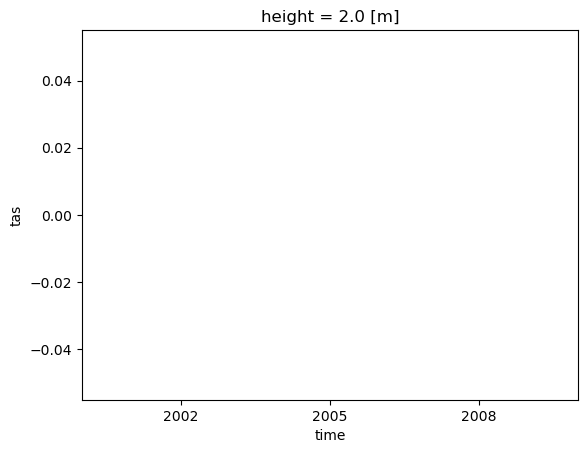

In [27]:
new_ds.tas.mean(dim=['lat', 'lon']).plot()

In [5]:
ads = xr.open_dataset("/data/cristi/a/cristi/esm_data/cmip6/CESM2/abrupt-4xCO2/r1i1p1f1/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-099912.nc")
ads

<xarray.Dataset> Size: 3GB
Dimensions:   (lat: 192, nbnd: 2, lon: 288, time: 11988)
Coordinates:
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds  (lat, nbnd) float64 3kB ...
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds  (lon, nbnd) float64 5kB ...
  * time      (time) object 96kB 0001-01-15 12:00:00 ... 0999-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas       (time, lat, lon) float32 3GB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          hybrid
    branch_time_in_child:   -182500.0
    branch_time_in_parent:  182865.0
    case_id:                46
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/81280768-5338-4e76-a8cc-478d15b08664...
    variable_id:            tas
    variant_info:           CMIP6 CESM2 abrupt4xCO2 experiment with CAM6, int...
    variant_label:          r1i1p1f1

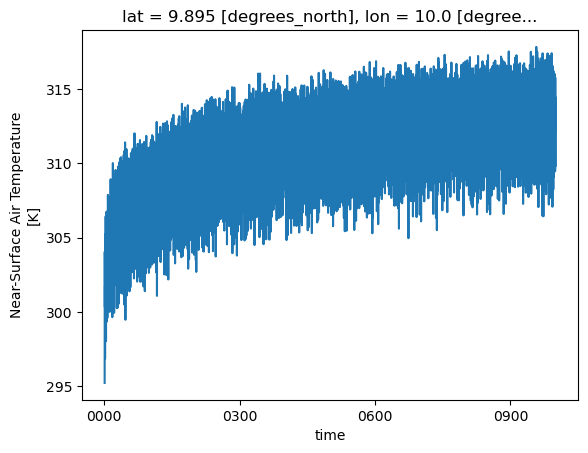

In [6]:
ads.tas.sel(lat=10, lon=10, method='nearest').plot()

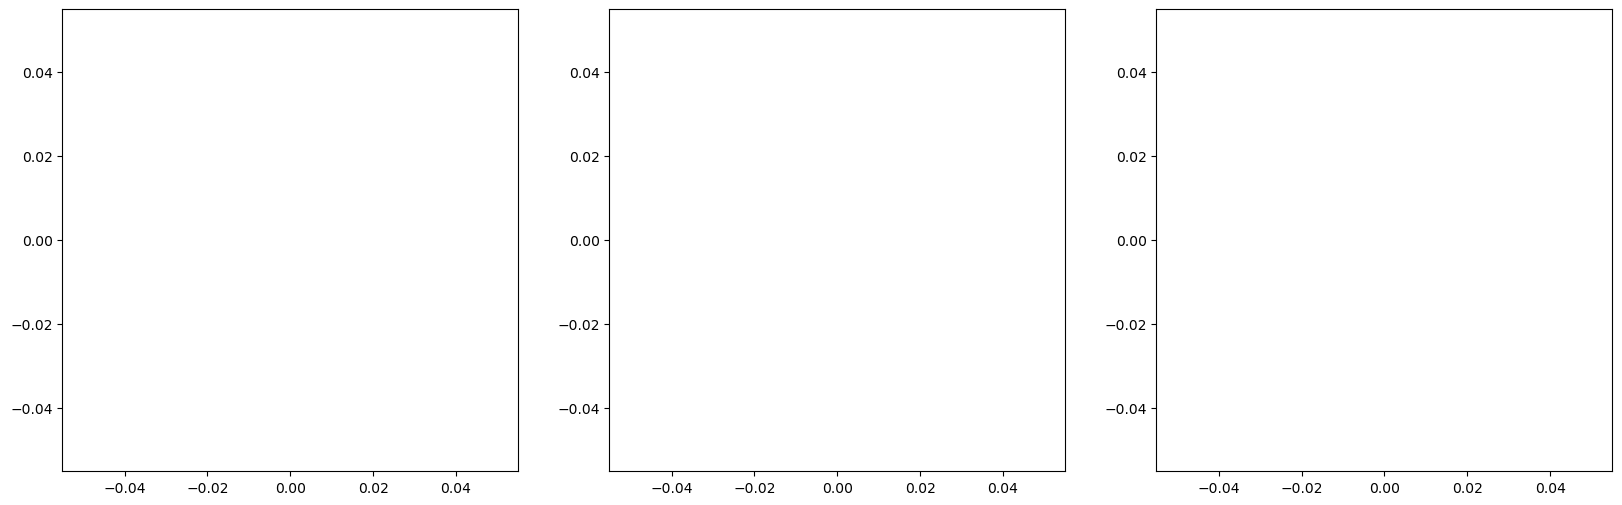

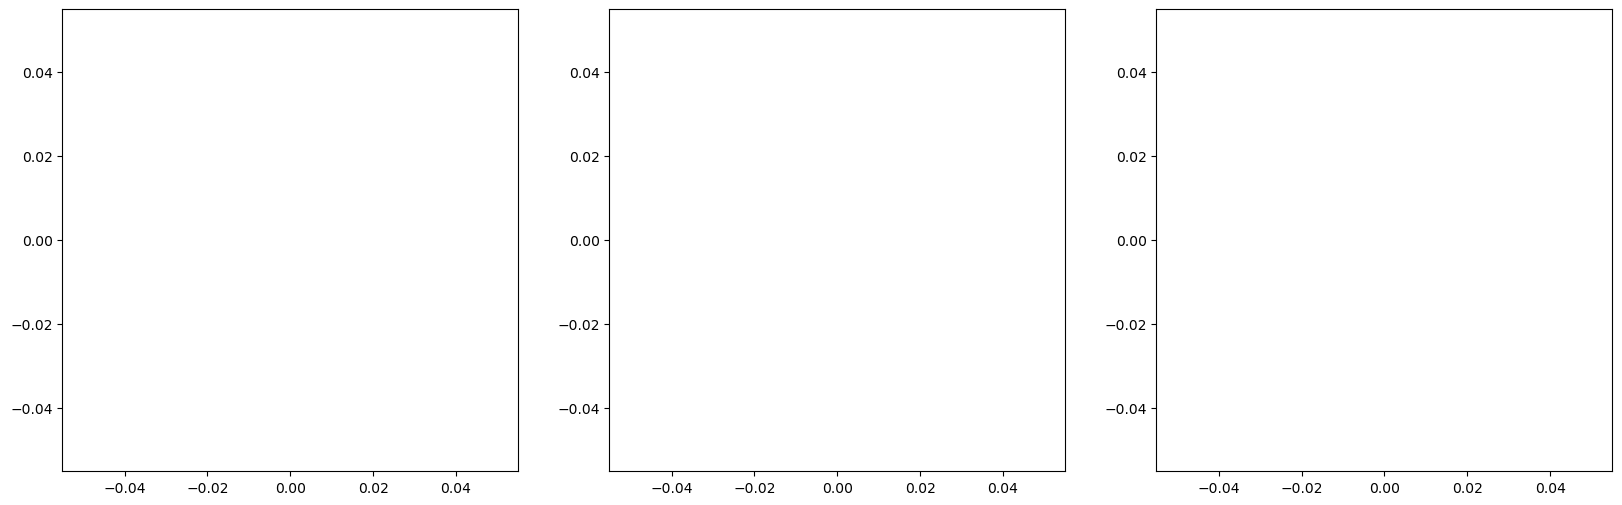

In [10]:
for n in range(2):
    plt.figure(figsize=[20,6])
    plt.subplot(1,3,1)
    plt.plot();
    
    plt.subplot(1,3,2)
    plt.plot();
    
    plt.subplot(1,3,3)
    plt.plot();

In [61]:
fname = "/data/cristi/a/kchoo3/FluxesProcessing/pre-processed/anom/tas-anom_Amon_TaiESM1_abrupt-4xCO2_r1i1p1f1_gn_0001-0150.nc"
some_ds = xr.open_dataset(fname)
some_ds

<xarray.Dataset> Size: 33MB
Dimensions:  (lat: 192, lon: 288, time: 150)
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1kB 0001-01-01 00:00:00 ... 0150-01-01 00:00:00
Data variables:
    tas      (time, lat, lon) float32 33MB ...

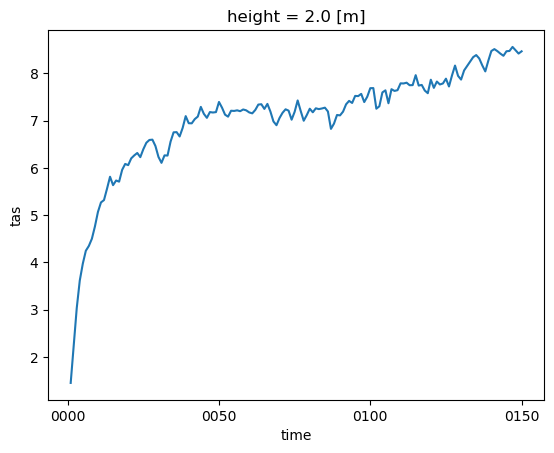

In [62]:
some_ds.tas.mean(dim=['lat','lon']).plot()